In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
dataFile = r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\sel_cells_20_50_10.csv'

In [3]:
myData = pd.read_csv(dataFile)

### Add useful transformations

In [4]:
# add physical time based on DHB length
myData['age_track'] = (myData.DHB_len - 1) *10 / 60

In [5]:
# add day of experiments (with 'd' because otherwise seaborn fails to recognize it as a category)
myData['day']=[f"d{x.split('_')[0]}" for x in myData.file]
myData = myData.astype({"day": 'object'})
set(myData['day'])

{'d20190506',
 'd20190607',
 'd20190609',
 'd20190625',
 'd20190701',
 'd201907012',
 'd201907016'}

In [6]:
myData.head()

,Unnamed: 0,Unnamed: 0.1,file,original cell name,Amy_mod,movie,x,y,ab1 (heterochromatin),ab1 ch,...,hetChrom_10_volume,random_10_volume,hetChrom_10perc_ch1,random_10perc_ch1,hetChrom_10perc_ch2,random_10perc_ch2,hetChrom_10perc_ch3,random_10perc_ch3,age_track,day
0,0,0,20190625_cell-00.czi,7LE1(B),1130/10,190619-cdc6-dhb-pcna002xy09,172,956,HP1B,1,...,45987.0,46247.0,6.366278e+08,281528813.0,174067475.0,131640512.0,1.352231e+09,1.043517e+09,0.666667,d20190625
1,1,1,20190625_cell-01.czi,7L-E1(T),0,190619-cdc6-dhb-pcna002xy09,158,906,HP1B,1,...,43651.0,43924.0,5.861875e+08,266516067.0,162411790.0,128299406.0,1.353023e+09,1.065184e+09,0.666667,d20190625
2,2,2,20190625_cell-02.czi,7L-E2(B),0,190619-cdc6-dhb-pcna002xy09,832,252,HP1B,1,...,39698.0,39812.0,6.928624e+08,318905411.0,194622718.0,148176740.0,1.366670e+09,1.118365e+09,2.000000,d20190625
3,3,3,20190625_cell-03.czi,7L-E2(T),0,190619-cdc6-dhb-pcna002xy09,888,160,HP1B,1,...,42159.0,41848.0,6.473978e+08,285348983.0,195376713.0,139563277.0,1.298882e+09,1.038559e+09,2.000000,d20190625
4,4,4,20190625_cell-05.czi,7L-G2,0,190619-cdc6-dhb-pcna002xy09,172,324,HP1B,1,...,81411.0,81271.0,1.506281e+09,698512214.0,248463390.0,183210463.0,2.583220e+09,2.158853e+09,19.500000,d20190625


In [40]:
myDataSel=myData.loc[((myData.decon==True) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=0.3

In [8]:
myDataSelnd=myData.loc[((myData.decon==False) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=0.3

## gestalt

### deconvoled gestalt

<IPython.core.display.Javascript object>


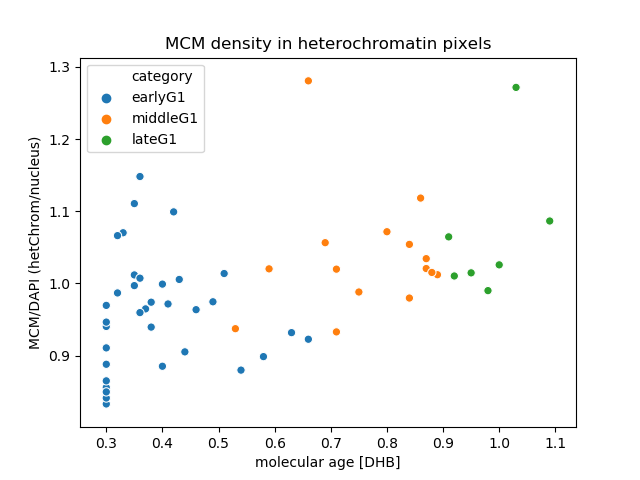

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [9]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_gestalt_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_gestalt_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


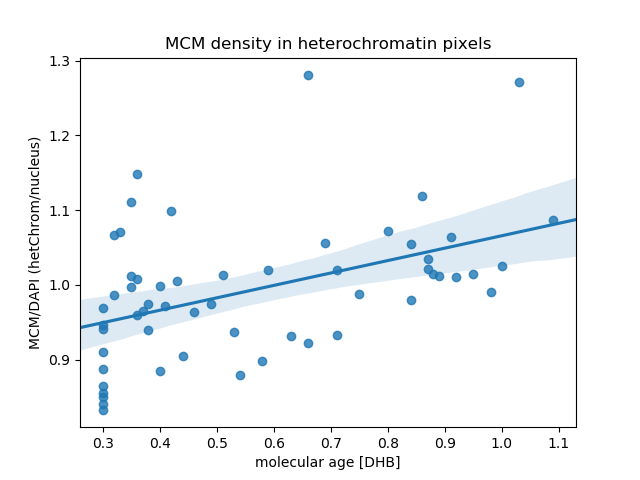

In [17]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_gestalt_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_gestalt_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
x=plt.title("MCM density in heterochromatin pixels")

In [18]:
# temp = (myDataSel.hetChrom_gestalt_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_gestalt_ch3/myDataSel.nucleus_Otsu_ch3)
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=0.07106975048329013, intercept=0.9692577677525324, rvalue=0.20541455067343098, pvalue=0.02501886182463286, stderr=0.031303952410248685)

to avoid the influence of setting the number to 0.3, we try to subtract 0.4 to spread out the selected data accordingly. 

however, the problem is that the younger cells are now treated older than the original older cells.

In [33]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=myDataSel['mol_age_mod']-.4

<IPython.core.display.Javascript object>


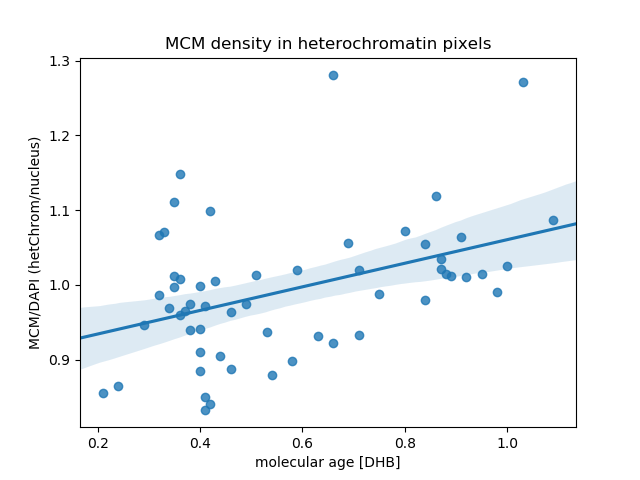

In [29]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_gestalt_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_gestalt_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
x=plt.title("MCM density in heterochromatin pixels")

In [32]:
# temp = (myDataSel.hetChrom_gestalt_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_gestalt_ch3/myDataSel.nucleus_Otsu_ch3)
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=0.07031849894201672, intercept=0.9698245026112778, rvalue=0.20710110321035255, pvalue=0.023826228982094643, stderr=0.030709657896813486)

### not deconvolved 

<IPython.core.display.Javascript object>


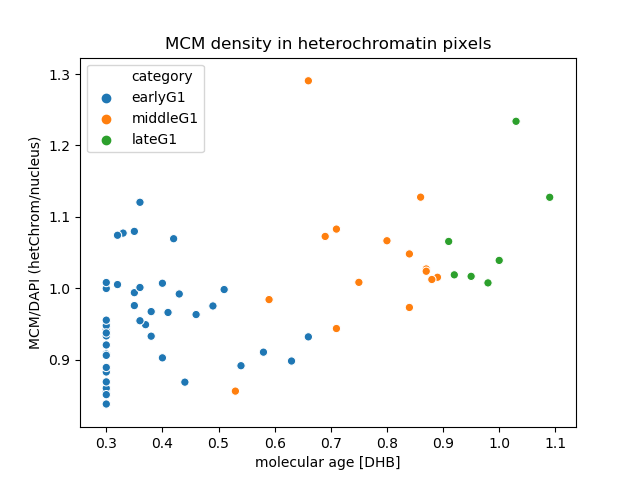

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [11]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_gestalt_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_gestalt_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [12]:
# temp=(myDataSelnd.hetChrom_gestalt_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_gestalt_ch3/myDataSelnd.nucleus_Otsu_ch3)
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=0.0643082907970804, intercept=0.9571955400228837, rvalue=0.24981561320204415, pvalue=0.004618584240940667, stderr=0.02229458363655009)

<IPython.core.display.Javascript object>


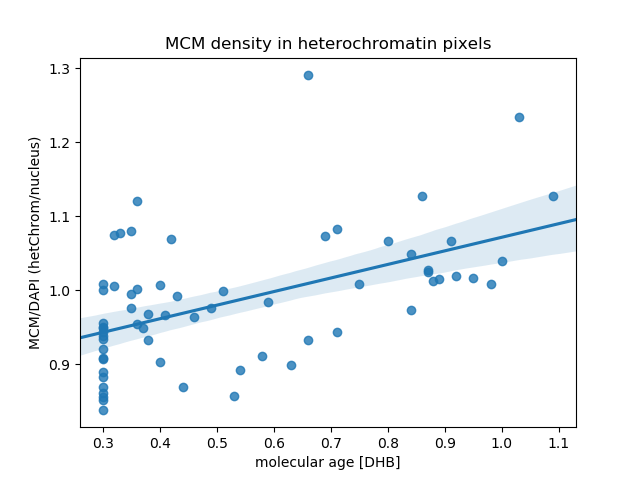

In [35]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_gestalt_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_gestalt_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
x=plt.title("MCM density in heterochromatin pixels")

In [36]:
# temp = (myDataSel.hetChrom_gestalt_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_gestalt_ch3/myDataSel.nucleus_Otsu_ch3)
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=0.0643082907970804, intercept=0.9571955400228837, rvalue=0.24981561320204415, pvalue=0.004618584240940667, stderr=0.02229458363655009)

## Manual

### deconvoled

<IPython.core.display.Javascript object>


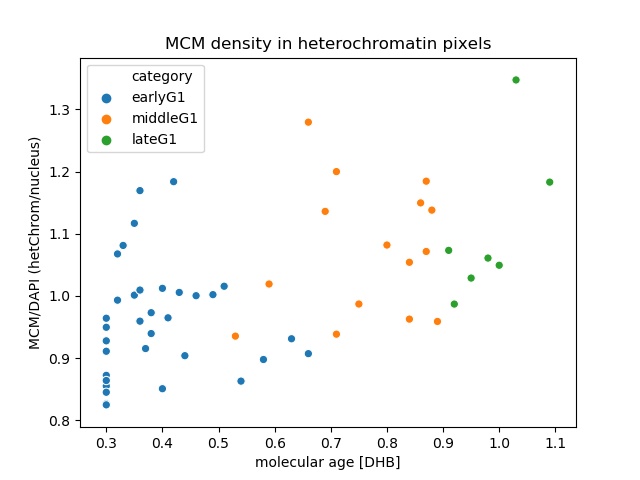

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [13]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_manual_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_manual_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [14]:
# temp = (myDataSel.hetChrom_manual_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_manual_ch3/myDataSel.nucleus_Otsu_ch3)
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=0.0868065665672764, intercept=0.9734252222894844, rvalue=0.21293853636916482, pvalue=0.020066656022394585, stderr=0.03682384256383929)

<IPython.core.display.Javascript object>


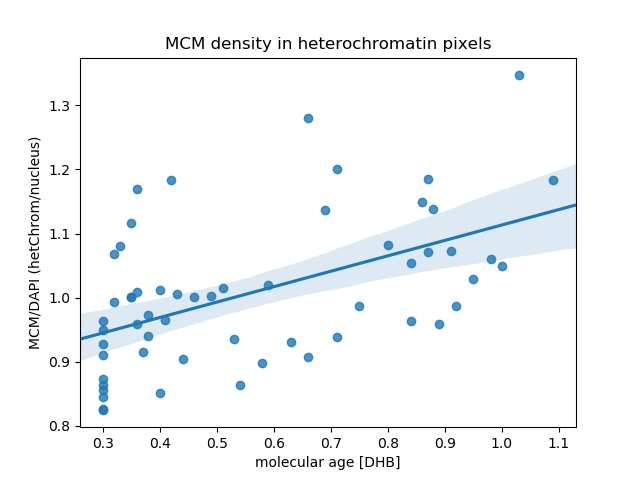

In [41]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_manual_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_manual_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
x=plt.title("MCM density in heterochromatin pixels")

In [42]:
# temp = (myDataSel.hetChrom_gestalt_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_gestalt_ch3/myDataSel.nucleus_Otsu_ch3)
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=0.0868065665672764, intercept=0.9734252222894844, rvalue=0.21293853636916482, pvalue=0.020066656022394585, stderr=0.03682384256383929)

### not deconvolved 

<IPython.core.display.Javascript object>


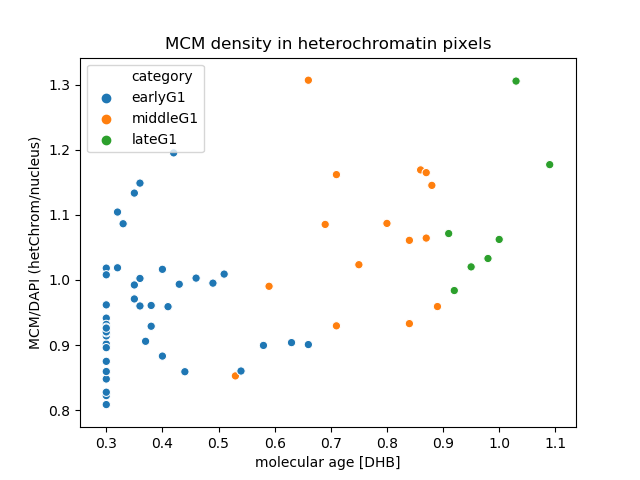

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [15]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_manual_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_manual_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [16]:
# temp = (myDataSelnd.hetChrom_manual_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_manual_ch3/myDataSelnd.nucleus_Otsu_ch3)
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=0.07842421647281418, intercept=0.9589436826281679, rvalue=0.22187503109748516, pvalue=0.012175653537675576, stderr=0.03082654280861795)

<IPython.core.display.Javascript object>


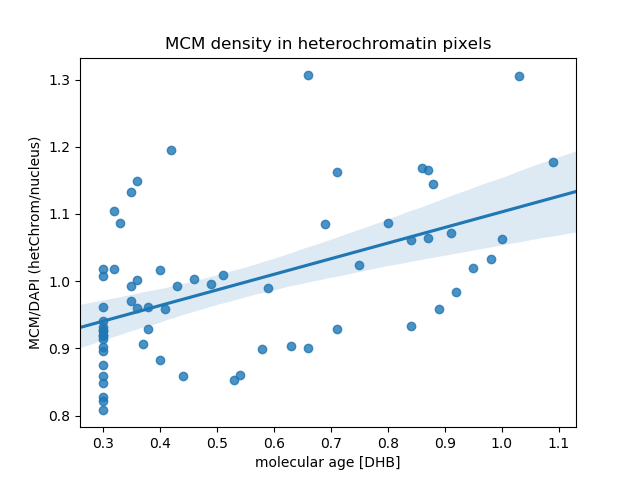

In [43]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_manual_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_manual_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
x=plt.title("MCM density in heterochromatin pixels")

In [44]:
# temp = (myDataSel.hetChrom_gestalt_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_gestalt_ch3/myDataSel.nucleus_Otsu_ch3)
x = np.array(myDataSelnd.mol_age_mod)
y = np.array(myDataSelnd.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
stats.linregress(x,y)

LinregressResult(slope=0.07842421647281418, intercept=0.9589436826281679, rvalue=0.22187503109748516, pvalue=0.012175653537675576, stderr=0.03082654280861795)